In [1]:
import tensorflow as tf

In [2]:
hello = tf.constant("Hello, TensorFlow!")

sess = tf.Session()

print(sess.run(hello))

b'Hello, TensorFlow!'


# Computational Graph

In [3]:
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0)
node3 = tf.add(node1, node2)

In [4]:
print("node1:", node1, "node2:", node2)
print("node3: ", node3)

node1: Tensor("Const_1:0", shape=(), dtype=float32) node2: Tensor("Const_2:0", shape=(), dtype=float32)
node3:  Tensor("Add:0", shape=(), dtype=float32)


In [5]:
sess = tf.Session()
print("sess.run(node1, node2): ", sess.run([node1, node2]) )
print("sess.run(node3): ", sess.run(node3))

sess.run(node1, node2):  [3.0, 4.0]
sess.run(node3):  7.0


# Placeholder

In [6]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b

print(sess.run(adder_node, feed_dict = {a: 3, b: 4.5}))
print(sess.run(adder_node, feed_dict = {a: [1,3], b: [2,4]}))

7.5
[3. 7.]


In [7]:
add_and_triple = adder_node * 3.
print(sess.run(add_and_triple, feed_dict={a: 3, b:4.5}))

22.5


# lab 02 TensorFlow로 간단한 linear regression 구현

In [14]:
import tensorflow as tf

x_train = [1,2,3]
y_train = [1,2,3]

W = tf.Variable(tf.random_normal([1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

hypothesis = x_train*W + b

In [15]:
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

# GradientDescent

In [16]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

In [18]:
sess = tf.Session()
# Initializes global variables in the graph
sess.run(tf.global_variables_initializer())

# Fit the line
for step in range(2001):
    sess.run(train)
    if step%20==0:
        print(step, sess.run(cost), sess.run(W), sess.run(b) )

0 17.420603 [-0.68606687] [-0.56809336]
20 0.16067691 [0.78456527] [0.07068123]
40 0.0039356058 [0.92717737] [0.12564096]
60 0.0022869457 [0.94321513] [0.12528582]
80 0.0020653685 [0.947085] [0.11992629]
100 0.0018756945 [0.94968617] [0.11434054]
120 0.0017035339 [0.9520617] [0.10897176]
140 0.0015471826 [0.95431566] [0.10385094]
160 0.0014051736 [0.9564627] [0.09897039]
180 0.0012762047 [0.95850885] [0.09431915]
200 0.0011590678 [0.96045876] [0.0898865]
220 0.0010526829 [0.96231705] [0.08566217]
240 0.0009560634 [0.96408796] [0.08163638]
260 0.0008683132 [0.9657757] [0.07779981]
280 0.00078861736 [0.96738416] [0.07414352]
300 0.00071622996 [0.968917] [0.07065907]
320 0.00065049704 [0.9703778] [0.0673383]
340 0.0005907851 [0.9717699] [0.06417361]
360 0.00053656317 [0.97309667] [0.06115768]
380 0.00048731422 [0.974361] [0.05828348]
400 0.00044258704 [0.97556597] [0.05554436]
420 0.00040196444 [0.97671425] [0.05293397]
440 0.00036506995 [0.9778086] [0.05044628]
460 0.00033156367 [0.97885

In [8]:
W = tf.Variable(tf.random_normal([1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

X = tf.placeholder(tf.float32, shape = [None])
Y = tf.placeholder(tf.float32, shape = [None])


hypothesis = X * W +b

cost = tf.reduce_mean(tf.square(hypothesis - Y))

train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, W_val, b_val,_ = sess.run([cost, W, b, train],
                                       feed_dict = {X: [1,2,3], Y:[1,2,3]})
    if step %20 ==0:
        print(step, cost_val, W_val, b_val)

0 13.90005 [-0.7980317] [0.61729544]
20 0.3064741 [0.38355997] [1.0708972]
40 0.16666307 [0.51699454] [1.066523]
60 0.15035346 [0.549641] [1.0207759]
80 0.13654429 [0.5717534] [0.9732198]
100 0.1240116 [0.59196967] [0.92752177]
120 0.11262936 [0.61115414] [0.8839356]
140 0.10229179 [0.62942916] [0.84239423]
160 0.092903055 [0.64684474] [0.8028049]
180 0.08437607 [0.6634417] [0.7650761]
200 0.07663173 [0.6792587] [0.72912043]
220 0.069598116 [0.6943323] [0.6948544]
240 0.06321014 [0.7086976] [0.66219866]
260 0.057408426 [0.7223878] [0.6310778]
280 0.05213924 [0.7354346] [0.6014194]
300 0.047353685 [0.7478682] [0.5731548]
320 0.043007378 [0.75971746] [0.54621863]
340 0.039059993 [0.7710099] [0.5205483]
360 0.0354749 [0.7817716] [0.49608448]
380 0.032218885 [0.7920275] [0.47277033]
400 0.029261714 [0.80180144] [0.4505519]
420 0.026575955 [0.81111604] [0.42937765]
440 0.024136692 [0.8199929] [0.40919846]
460 0.021921335 [0.8284525] [0.3899676]
480 0.0199093 [0.83651465] [0.37164056]
500 0.

In [19]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

for step in range(2001):
    cost_val, W_val, b_val, _ = \
        sess.run([cost, W, b, train],
                feed_dict = {X: [1,2,3], Y:[1,2,3]})
    if step %20 ==0:
        print(step, cost_val, W_val, b_val)

0 2.0013276e-07 [0.99948156] [0.00117842]
20 1.8182506e-07 [0.9995058] [0.00112308]
40 1.6518585e-07 [0.999529] [0.00107036]
60 1.5003332e-07 [0.9995511] [0.00102012]
80 1.3627489e-07 [0.9995722] [0.00097223]
100 1.2374132e-07 [0.99959236] [0.00092661]
120 1.1241914e-07 [0.99961144] [0.00088315]
140 1.02133065e-07 [0.9996296] [0.00084169]
160 9.273612e-08 [0.999647] [0.00080216]
180 8.427921e-08 [0.9996637] [0.00076455]
200 7.65327e-08 [0.9996793] [0.00072867]
220 6.950872e-08 [0.9996944] [0.00069445]
240 6.315771e-08 [0.9997087] [0.00066193]
260 5.7390043e-08 [0.99972236] [0.00063086]
280 5.2124303e-08 [0.9997355] [0.0006013]
300 4.738017e-08 [0.99974775] [0.00057307]
320 4.302221e-08 [0.9997597] [0.00054625]
340 3.9068393e-08 [0.9997709] [0.00052058]
360 3.551359e-08 [0.9997816] [0.00049623]
380 3.223968e-08 [0.9997919] [0.00047292]
400 2.9319338e-08 [0.9998015] [0.00045081]
420 2.6619494e-08 [0.99981105] [0.0004297]
440 2.4164763e-08 [0.99981976] [0.00040951]
460 2.1984127e-08 [0.99

In [10]:
W = tf.Variable(tf.random_normal([1], name = 'weight'))
b = tf.Variable(tf.random_normal([1], name = 'bias'))
X = tf.placeholder(tf.float32, shape=[None])
Y = tf.placeholder(tf.float32, shape=[None])

hypothesis = X*W + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, W_val, b_val, _ = sess.run([cost, W, b, train],
                                        feed_dict= {X:[1,2,3,4,5], Y:[2.1, 3.1, 4.1, 5.1, 6.1]})
    if step %20 == 0:
        print( step, cost_val, W_val, b_val)


print(sess.run(hypothesis, feed_dict={X:[5]}))
print(sess.run(hypothesis, feed_dict={X:[2.5]}))
print(sess.run(hypothesis, feed_dict={X:[1.5, 3.5]}))

0 5.22023 [0.66452503] [0.42141402]
20 0.04745478 [1.1385983] [0.59108037]
40 0.04135056 [1.1315635] [0.6249755]
60 0.036111765 [1.1229564] [0.65608776]
80 0.031536687 [1.114904] [0.6851599]
100 0.027541216 [1.1073788] [0.71232814]
120 0.02405195 [1.1003464] [0.7377172]
140 0.021004738 [1.0937747] [0.7614433]
160 0.018343573 [1.0876334] [0.78361577]
180 0.016019579 [1.0818942] [0.8043361]
200 0.013990012 [1.0765308] [0.82369936]
220 0.012217597 [1.0715189] [0.8417945]
240 0.010669683 [1.0668349] [0.85870457]
260 0.009317936 [1.0624579] [0.8745071]
280 0.008137429 [1.0583675] [0.88927484]
300 0.007106477 [1.054545] [0.9030753]
320 0.0062061413 [1.0509728] [0.915972]
340 0.0054198783 [1.0476345] [0.9280241]
360 0.004733223 [1.0445149] [0.9392868]
380 0.004133568 [1.0415998] [0.94981194]
400 0.0036098813 [1.0388752] [0.95964783]
420 0.003152543 [1.0363294] [0.9688396]
440 0.00275313 [1.0339501] [0.97742945]
460 0.0024043242 [1.0317266] [0.98545676]
480 0.0020997121 [1.0296488] [0.9929583]

In [12]:
print(sess.run(hypothesis, feed_dict={X:[7]}))

[8.100585]


# lab 03 - Linear Regression의 cost 최소화의 TensorFlow 구현

In [13]:
X = [1,2,3]
Y = [1,2,3]

W = tf.placeholder(tf.float32)
#Our hypothesis for linear model X*W
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis-Y))
sess=tf.Session()
sess.run(tf.global_variables_initializer())

W_val = []
cost_val = []
for i in range(-30, 50):
    feed_W = i *0.1
    curr_cost, curr_W = sess.run([cost, W], feed_dict={W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)


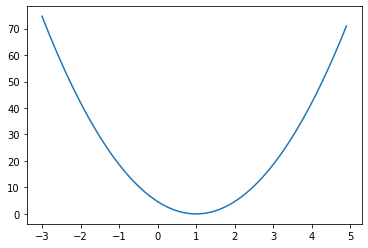

In [15]:
import matplotlib.pyplot as plt
plt.plot(W_val, cost_val)
plt.show()

In [16]:
x_data = [1,2,3]
y_data = [1,2,3]

W = tf.Variable(tf.random_normal([1]), name= 'weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

hypothesis = X*W

cost = tf.reduce_mean(tf.square(hypothesis-Y))

learning_rate = 0.1
gradient = tf.reduce_mean((W*X-Y)*X)
descent = W - learning_rate * gradient
update = W.assign(descent)

sess = tf.Session()

sess.run(tf.global_variables_initializer())
for step in range(21):
    sess.run(update, feed_dict={X: x_data, Y: y_data})
    print(step, sess.run(cost, feed_dict={X:x_data, Y:y_data}), sess.run(W))

0 4.079956 [0.06497258]
1 1.1605209 [0.5013187]
2 0.33010378 [0.7340366]
3 0.09389617 [0.85815287]
4 0.02670825 [0.9243482]
5 0.0075970194 [0.95965236]
6 0.0021609224 [0.9784813]
7 0.0006146642 [0.98852336]
8 0.00017483563 [0.99387914]
9 4.973247e-05 [0.9967355]
10 1.41463e-05 [0.99825895]
11 4.023595e-06 [0.9990715]
12 1.1443528e-06 [0.9995048]
13 3.2548314e-07 [0.9997359]
14 9.2558366e-08 [0.99985915]
15 2.6321345e-08 [0.9999249]
16 7.48696e-09 [0.99995995]
17 2.1197906e-09 [0.99997866]
18 6.034746e-10 [0.9999886]
19 1.7104658e-10 [0.9999939]
20 4.976286e-11 [0.9999967]


In [18]:
X = [1,2,3]
Y = [1,2,3]

W = tf.Variable(-3.0)

hypothesis = X*W

cost = tf.reduce_mean(tf.square(hypothesis-Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(100):
    print(step, sess.run(W))
    sess.run(train)

0 -3.0
1 0.7333336
2 0.98222226
3 0.9988148
4 0.99992096
5 0.9999947
6 0.99999964
7 0.99999994
8 1.0
9 1.0
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0
20 1.0
21 1.0
22 1.0
23 1.0
24 1.0
25 1.0
26 1.0
27 1.0
28 1.0
29 1.0
30 1.0
31 1.0
32 1.0
33 1.0
34 1.0
35 1.0
36 1.0
37 1.0
38 1.0
39 1.0
40 1.0
41 1.0
42 1.0
43 1.0
44 1.0
45 1.0
46 1.0
47 1.0
48 1.0
49 1.0
50 1.0
51 1.0
52 1.0
53 1.0
54 1.0
55 1.0
56 1.0
57 1.0
58 1.0
59 1.0
60 1.0
61 1.0
62 1.0
63 1.0
64 1.0
65 1.0
66 1.0
67 1.0
68 1.0
69 1.0
70 1.0
71 1.0
72 1.0
73 1.0
74 1.0
75 1.0
76 1.0
77 1.0
78 1.0
79 1.0
80 1.0
81 1.0
82 1.0
83 1.0
84 1.0
85 1.0
86 1.0
87 1.0
88 1.0
89 1.0
90 1.0
91 1.0
92 1.0
93 1.0
94 1.0
95 1.0
96 1.0
97 1.0
98 1.0
99 1.0


In [19]:
X = [1, 2, 3]
Y = [1, 2, 3]
# Set wrong model weights
W = tf.Variable(5.)
# Linear model
hypothesis = X * W
# Manual gradient
gradient = tf.reduce_mean((W * X - Y) * X) * 2
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

# Get gradients
gvs = optimizer.compute_gradients(cost, [W])
# Apply gradients
apply_gradients = optimizer.apply_gradients(gvs)

# Launch the graph in a session.
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(100):
   print(step, sess.run([gradient, W, gvs]))
   sess.run(apply_gradients)


0 [37.333332, 5.0, [(37.333336, 5.0)]]
1 [33.84889, 4.6266665, [(33.84889, 4.6266665)]]
2 [30.689657, 4.2881775, [(30.689657, 4.2881775)]]
3 [27.825287, 3.9812808, [(27.825287, 3.9812808)]]
4 [25.228262, 3.703028, [(25.228262, 3.703028)]]
5 [22.873621, 3.4507453, [(22.873623, 3.4507453)]]
6 [20.738752, 3.2220092, [(20.73875, 3.2220092)]]
7 [18.803137, 3.0146217, [(18.803137, 3.0146217)]]
8 [17.048176, 2.8265903, [(17.048176, 2.8265903)]]
9 [15.457013, 2.6561086, [(15.457014, 2.6561086)]]
10 [14.014359, 2.5015385, [(14.01436, 2.5015385)]]
11 [12.706352, 2.361395, [(12.706352, 2.361395)]]
12 [11.520427, 2.2343314, [(11.520427, 2.2343314)]]
13 [10.445186, 2.119127, [(10.445185, 2.119127)]]
14 [9.470302, 2.0146751, [(9.470302, 2.0146751)]]
15 [8.586407, 1.9199722, [(8.586407, 1.9199722)]]
16 [7.785009, 1.8341081, [(7.785009, 1.8341081)]]
17 [7.0584083, 1.756258, [(7.0584083, 1.756258)]]
18 [6.399624, 1.685674, [(6.399624, 1.685674)]]
19 [5.8023257, 1.6216778, [(5.8023252, 1.6216778)]]
20 [

# lab 04 multi-variable linear regression

In [21]:
x1_data=[73., 93., 89., 96., 73.]
x2_data=[80., 88., 91., 98., 66.]
x3_data=[75., 93., 90., 100., 70.]
y_data=[152., 185., 180., 196., 142.]

x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)

Y = tf.placeholder(tf.float32)

w1 = tf.Variable(tf.random_normal([1]), name = 'weight1')
w2 = tf.Variable(tf.random_normal([1]), name = 'weight2')
w3 = tf.Variable(tf.random_normal([1]), name = 'weight3')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

hypothesis = x1*w1 + x2*w2 + x3*w3 +b

cost = tf.reduce_mean(tf.square(hypothesis-Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                                  feed_dict={x1: x1_data, x2: x2_data, x3: x3_data, Y: y_data})
    if step %20 ==0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

0 Cost:  46048.418 
Prediction:
 [-44.984123 -40.15237  -46.926968 -49.225113 -28.629835]
20 Cost:  14.76042 
Prediction:
 [145.41774 188.64102 178.536   196.29424 145.87157]
40 Cost:  14.610542 
Prediction:
 [145.44875 188.62314 178.54712 196.3022  145.84766]
60 Cost:  14.46223 
Prediction:
 [145.47786 188.60326 178.55614 196.3079  145.82228]
80 Cost:  14.315523 
Prediction:
 [145.50682 188.58351 178.56514 196.31357 145.79704]
100 Cost:  14.170413 
Prediction:
 [145.53561 188.56384 178.57404 196.3192  145.77194]
120 Cost:  14.026876 
Prediction:
 [145.56425 188.5443  178.58293 196.32478 145.747  ]
140 Cost:  13.884827 
Prediction:
 [145.59274 188.52484 178.59177 196.33035 145.72215]
160 Cost:  13.744308 
Prediction:
 [145.6211  188.5055  178.60056 196.33588 145.69748]
180 Cost:  13.605316 
Prediction:
 [145.64928 188.48625 178.60931 196.34138 145.67293]
200 Cost:  13.46781 
Prediction:
 [145.6773  188.4671  178.61798 196.34683 145.6485 ]
220 Cost:  13.331815 
Prediction:
 [145.7052  1

In [22]:
x_data=[[73., 80., 75.], [93., 88., 93.], [89., 91., 90.], [96., 98., 100.], [73., 66., 70.]]
y_data=[[152.], [185.], [180.], [196.], [142.]]

X = tf.placeholder(tf.float32, shape = [None, 3])
Y = tf.placeholder(tf.float32, shape = [None, 1])

w = tf.Variable(tf.random_normal([3,1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

hypothesis = tf.matmul(X,w) + b

cost = tf.reduce_mean(tf.square(hypothesis-Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                                  feed_dict={X: x_data, Y: y_data})
    if step %10 ==0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

0 Cost:  81305.58 
Prediction:
 [[-106.06694 ]
 [-116.439354]
 [-120.49417 ]
 [-129.94577 ]
 [ -87.18607 ]]
10 Cost:  8.933539 
Prediction:
 [[146.17184]
 [186.71242]
 [178.2171 ]
 [195.34175]
 [144.0386 ]]
20 Cost:  8.148565 
Prediction:
 [[146.94579]
 [187.6223 ]
 [179.12424]
 [196.32805]
 [144.72887]]
30 Cost:  8.1079855 
Prediction:
 [[146.95888]
 [187.61774]
 [179.13034]
 [196.3331 ]
 [144.72162]]
40 Cost:  8.067635 
Prediction:
 [[146.96964]
 [187.61041]
 [179.13367]
 [196.33519]
 [144.71228]]
50 Cost:  8.027559 
Prediction:
 [[146.98035]
 [187.6031 ]
 [179.13701]
 [196.33727]
 [144.703  ]]
60 Cost:  7.9876924 
Prediction:
 [[146.99103]
 [187.59583]
 [179.14032]
 [196.33932]
 [144.69373]]
70 Cost:  7.94798 
Prediction:
 [[147.00168]
 [187.58853]
 [179.14362]
 [196.34137]
 [144.68445]]
80 Cost:  7.908496 
Prediction:
 [[147.01231]
 [187.58128]
 [179.14693]
 [196.3434 ]
 [144.67522]]
90 Cost:  7.869283 
Prediction:
 [[147.02292]
 [187.57408]
 [179.15022]
 [196.34546]
 [144.66603]]


1230 Cost:  4.5333643 
Prediction:
 [[148.06343]
 [186.86461]
 [179.47395]
 [196.5413 ]
 [143.76741]]
1240 Cost:  4.5122437 
Prediction:
 [[148.07123]
 [186.85931]
 [179.47638]
 [196.54276]
 [143.76073]]
1250 Cost:  4.4911866 
Prediction:
 [[148.07901]
 [186.854  ]
 [179.4788 ]
 [196.54417]
 [143.75404]]
1260 Cost:  4.470234 
Prediction:
 [[148.08679]
 [186.84872]
 [179.48126]
 [196.5456 ]
 [143.7474 ]]
1270 Cost:  4.4494343 
Prediction:
 [[148.09451]
 [186.84344]
 [179.48364]
 [196.547  ]
 [143.74075]]
1280 Cost:  4.4287543 
Prediction:
 [[148.10222]
 [186.83818]
 [179.48605]
 [196.54842]
 [143.73415]]
1290 Cost:  4.40816 
Prediction:
 [[148.10992]
 [186.83296]
 [179.48846]
 [196.54982]
 [143.72754]]
1300 Cost:  4.387658 
Prediction:
 [[148.11761]
 [186.82773]
 [179.49086]
 [196.55122]
 [143.72096]]
1310 Cost:  4.3672843 
Prediction:
 [[148.12526]
 [186.8225 ]
 [179.49324]
 [196.55263]
 [143.71439]]
1320 Cost:  4.3470025 
Prediction:
 [[148.1329 ]
 [186.81729]
 [179.49562]
 [196.554  

# lab 04-2 파일에서 데이터 읽어오기

In [25]:
import numpy as np

In [27]:
xy = np.loadtxt('DeepLearningZeroToAll-master/data-01-test-score.csv', delimiter=',', dtype=np.float32) 

In [28]:
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

# Make sure the shape and data are OK
print(x_data, "\nx_data shape:", x_data.shape)
print(y_data, "\ny_data shape:", y_data.shape)

[[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]] 
x_data shape: (25, 3)
[[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]] 
y_data shape: (25, 1)


In [29]:
X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train], 
                                   feed_dict={X: x_data, Y: y_data})
    if step % 10 == 0:
        print(step, "Cost:", cost_val, "\nPrediction:\n", hy_val)


0 Cost: 106171.19 
Prediction:
 [[-152.33072 ]
 [-182.53934 ]
 [-180.13492 ]
 [-197.03644 ]
 [-138.23245 ]
 [-102.89096 ]
 [-148.70044 ]
 [-112.012825]
 [-171.36926 ]
 [-160.38284 ]
 [-142.21893 ]
 [-140.22696 ]
 [-185.29498 ]
 [-152.73386 ]
 [-149.3735  ]
 [-186.06793 ]
 [-144.24675 ]
 [-179.24918 ]
 [-176.59952 ]
 [-158.16388 ]
 [-174.107   ]
 [-172.02872 ]
 [-165.79675 ]
 [-151.66876 ]
 [-188.93457 ]]
10 Cost: 25.878567 
Prediction:
 [[151.88313]
 [183.10754]
 [180.13719]
 [195.33485]
 [140.62901]
 [102.7152 ]
 [145.01183]
 [105.73934]
 [170.36543]
 [156.16443]
 [140.75273]
 [138.79639]
 [186.90825]
 [156.66571]
 [145.69115]
 [184.98404]
 [150.40945]
 [173.23679]
 [178.2403 ]
 [159.33351]
 [170.31593]
 [171.00394]
 [162.58037]
 [155.0336 ]
 [190.01099]]
20 Cost: 20.705172 
Prediction:
 [[153.9768 ]
 [185.63329]
 [182.62036]
 [198.04716]
 [142.55106]
 [104.14559]
 [147.0513 ]
 [107.26389]
 [172.7378 ]
 [158.38022]
 [142.71228]
 [140.73572]
 [189.46571]
 [158.78096]
 [147.74228]
 [187

600 Cost: 15.743748 
Prediction:
 [[153.58792 ]
 [185.6077  ]
 [182.3338  ]
 [198.14594 ]
 [142.30226 ]
 [104.647705]
 [147.61234 ]
 [108.34775 ]
 [173.31839 ]
 [159.8657  ]
 [142.96246 ]
 [141.3349  ]
 [188.75607 ]
 [157.6323  ]
 [148.41736 ]
 [187.87881 ]
 [150.9611  ]
 [176.51791 ]
 [179.86581 ]
 [160.81519 ]
 [173.28119 ]
 [173.72964 ]
 [165.24979 ]
 [155.77158 ]
 [192.33359 ]]
610 Cost: 15.676174 
Prediction:
 [[153.58208 ]
 [185.60677 ]
 [182.32922 ]
 [198.14723 ]
 [142.29788 ]
 [104.65488 ]
 [147.62094 ]
 [108.364624]
 [173.3266  ]
 [159.88776 ]
 [142.96611 ]
 [141.3436  ]
 [188.745   ]
 [157.61452 ]
 [148.42761 ]
 [187.88329 ]
 [150.93843 ]
 [176.5308  ]
 [179.85332 ]
 [160.8045  ]
 [173.28995 ]
 [173.73453 ]
 [165.2558  ]
 [155.75095 ]
 [192.3287  ]]
620 Cost: 15.609113 
Prediction:
 [[153.57626]
 [185.60583]
 [182.32468]
 [198.14853]
 [142.29349]
 [104.662  ]
 [147.62952]
 [108.38145]
 [173.33476]
 [159.90968]
 [142.96976]
 [141.35225]
 [188.734  ]
 [157.5968 ]
 [148.43782]
 

1190 Cost: 12.517775 
Prediction:
 [[153.29594]
 [185.54437]
 [182.09607]
 [198.21815]
 [142.05211]
 [105.00769]
 [148.07811]
 [109.26019]
 [173.73044]
 [161.00502]
 [143.1568 ]
 [141.78036]
 [188.17589]
 [156.69502]
 [148.96487]
 [188.10376]
 [149.75536]
 [177.21968]
 [179.21571]
 [160.26253]
 [173.75092]
 [173.9753 ]
 [165.57877]
 [154.69928]
 [192.0665 ]]
1200 Cost: 12.4745035 
Prediction:
 [[153.29181 ]
 [185.54317 ]
 [182.09256 ]
 [198.21927 ]
 [142.048   ]
 [105.012794]
 [148.08531 ]
 [109.274284]
 [173.73627 ]
 [161.02173 ]
 [143.15974 ]
 [141.78682 ]
 [188.16722 ]
 [156.68094 ]
 [148.9732  ]
 [188.10693 ]
 [149.73706 ]
 [177.23059 ]
 [179.20609 ]
 [160.2544  ]
 [173.75813 ]
 [173.97878 ]
 [165.5839  ]
 [154.68343 ]
 [192.06232 ]]
1210 Cost: 12.43153 
Prediction:
 [[153.28775 ]
 [185.54199 ]
 [182.08907 ]
 [198.22044 ]
 [142.04396 ]
 [105.01787 ]
 [148.0925  ]
 [109.288345]
 [173.74208 ]
 [161.03839 ]
 [143.16269 ]
 [141.79327 ]
 [188.15862 ]
 [156.66693 ]
 [148.98154 ]
 [188.11

1760 Cost: 10.496466 
Prediction:
 [[153.09837]
 [185.47264]
 [181.91917]
 [198.27998]
 [141.82845]
 [105.25471]
 [148.45633]
 [109.99978]
 [174.01274]
 [161.8438 ]
 [143.30914]
 [142.10123]
 [187.73499]
 [155.97499]
 [149.39772]
 [188.25838]
 [148.81174]
 [177.79619]
 [178.72935]
 [159.85559]
 [174.12773]
 [174.14598]
 [165.85136]
 [153.90025]
 [191.84598]]
1770 Cost: 10.467996 
Prediction:
 [[153.09552]
 [185.47133]
 [181.91646]
 [198.28099]
 [141.82469]
 [105.25831]
 [148.46242]
 [110.01166]
 [174.01686]
 [161.8566 ]
 [143.31155]
 [142.10608]
 [187.72813]
 [155.96375]
 [149.4046 ]
 [188.26064]
 [148.79686]
 [177.80551]
 [178.72186]
 [159.8494 ]
 [174.13376]
 [174.14851]
 [165.85579]
 [153.88799]
 [191.8424 ]]
1780 Cost: 10.43971 
Prediction:
 [[153.09268 ]
 [185.47    ]
 [181.91376 ]
 [198.28201 ]
 [141.82094 ]
 [105.2619  ]
 [148.46848 ]
 [110.023506]
 [174.02095 ]
 [161.86932 ]
 [143.31393 ]
 [142.11089 ]
 [187.7213  ]
 [155.95253 ]
 [149.41144 ]
 [188.26288 ]
 [148.78201 ]
 [177.

In [30]:
print("Your score will be ", sess.run(hypothesis, 
                                      feed_dict={X: [[100, 70, 101]]}))

print("Other scores will be ", sess.run(hypothesis,
                                        feed_dict={X: [[60, 70, 110], [90, 100, 80]]}))

Your score will be  [[187.12323]]
Other scores will be  [[165.86752]
 [179.51604]]
